# The Challenges and opportunities of online teaching  during COVID-19 pandemic.

## Loading the Data

In [27]:
#Importing the necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
print("Libraies successfully imported")

Libraies successfully imported


In [9]:
# Load the dataset
data = pd.read_csv('C:\\Users\\n\\Downloads\\online_teaching_survey_data.csv')

# Show the first few rows of the dataset
data.head()


,grade_level_teach,adaptation_level,curriculum_coverage,student_engagement,learning_outcomes,technology_used,tech_issues,admin_support,transition_difficulty,stress_impact,one_on_one_discussions,parent_support,additional_support,engagement_strategies,method_change,tech_access,socioeconomic_impact,future_practices,sustainability_belief,additional_comments
0,Secondary,Moderately,Effectively,Lower,No significant change,Teams,Internet connectivity,Well supported,3,Less affected,Once a week,Parents have played a crucial role in supporti...,"To improve my online teaching, I would benefit...","To keep the students engaged in online, I used...","Yes, I significantly adapted my teaching metho...","Yes ,I have reliable access to the necessary t...",Students from lower income families often face...,I will integrate more digital tools and online...,"Yes, but only as a supplement to traditional c...",Online education in India has had a mixed impa...
1,Pre- Primary,With difficulty,Neutral,Lower,Greatly decreased,Zoom,Internet connectivity,Well supported,5,More affected,Twice a month,Parents where encouraging their children to pa...,Teachers to be trained on usage of tools to m...,I would be calling names who are distracted an...,Yes,"At first no, then later made necessary arrange...",Parents argument and forcing child to answer f...,I will integrate more digital tools and online...,"No, it is not sustainable and should not repla...",Parents were complaining that their child was ...
2,Secondary,Moderately,Neutral,Lower,Slightly improved,Teams,Internet connectivity,Neutral,3,Less affected,Once a week,I got 50%parents support,My colleague support,Some special mudras and finger games used in m...,"Yes,extra interaction of students.",We had,70%students affected,I will integrate more digital tools and online...,"Yes, but only as a supplement to traditional c...",The biggest advantage is students can record a...
3,Secondary,Moderately,Neutral,Lower,No significant change,Teams,Internet connectivity,Well supported,3,More affected,Daily,Parents helped their level a lot.,More Technical knowledge.,Will Interact often.,Yes I have changed.,Yes,Nowadays all are having smart phone so no majo...,I will integrate more digital tools and online...,"Yes, but only as a supplement to traditional c...",Need concentration in students side.
4,Secondary,With difficulty,Neutral,Lower,Slightly improved,Teams,Internet connectivity,Neutral,3,Less affected,Daily,Not all the parents are supportive to the chil...,"No additional support, in every aspects we fin...","Using pictures,power point presentation multip...","Yes, observing and learning is different in ev...","Yes, not at full support.","During pandemic, economically some families ar...",I will integrate more digital tools and online...,"It is sustainable in certain contexts, but not...","During pandemic, education through online is n..."


In [4]:
# Get summary statistics and check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   grade_level_teach       14 non-null     object
 1   adaptation_level        14 non-null     object
 2   curriculum_coverage     14 non-null     object
 3   student_engagement      14 non-null     object
 4   learning_outcomes       14 non-null     object
 5   technology_used         14 non-null     object
 6   tech_issues             14 non-null     object
 7   admin_support           14 non-null     object
 8   transition_difficulty   14 non-null     int64 
 9   stress_impact           14 non-null     object
 10  one_on_one_discussions  14 non-null     object
 11  parent_support          14 non-null     object
 12  additional_support      14 non-null     object
 13  engagement_strategies   14 non-null     object
 14  method_change           14 non-null     object
 15  tech_acc

In [5]:
# Get descriptive statistics for numeric columns (if any)
data.describe()

,transition_difficulty
count,14.000000
mean,3.142857
std,0.662994
min,2.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,5.000000


In [6]:
# Check unique values in categorical columns
for column in data.columns:
    print(f"{column}: {data[column].unique()}")


grade_level_teach: ['Secondary' 'Pre- Primary' 'Primary']
adaptation_level: ['Moderately' 'With difficulty' 'Easily']
curriculum_coverage: ['Effectively' 'Neutral' 'Very effectively']
student_engagement: ['Lower' 'About the same' 'Much higher']
learning_outcomes: ['No significant change' 'Greatly decreased' 'Slightly improved']
technology_used: ['Teams' 'Zoom']
tech_issues: ['Internet connectivity' 'Software problems' 'Hardware issues']
admin_support: ['Well supported' 'Neutral']
transition_difficulty: [3 5 4 2]
stress_impact: ['Less affected' 'More affected' 'No change' ' ']
one_on_one_discussions: ['Once a week' 'Twice a month' 'Daily' 'Never']
parent_support: ['Parents have played a crucial role in supporting remote learning by managing schedules and creating conductive learning environment.'
 'Parents where encouraging their children to participate  when questions were raised and in activities and helped in home work '
 'I got 50%parents support ' 'Parents helped their level a lot.

#### a) Distribution of Technology Used

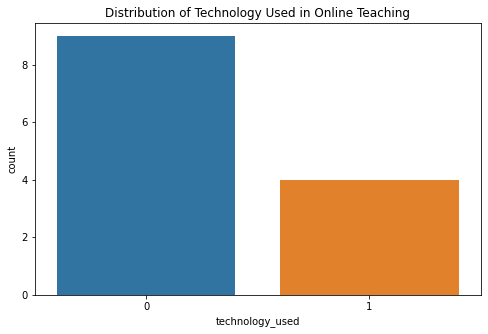

In [20]:
# Plot the distribution of technology used
plt.figure(figsize=(8, 5))
sns.countplot(x='technology_used', data=data_cleaned)
plt.title('Distribution of Technology Used in Online Teaching')
plt.show()


#### b) Future Practices in Online Teaching

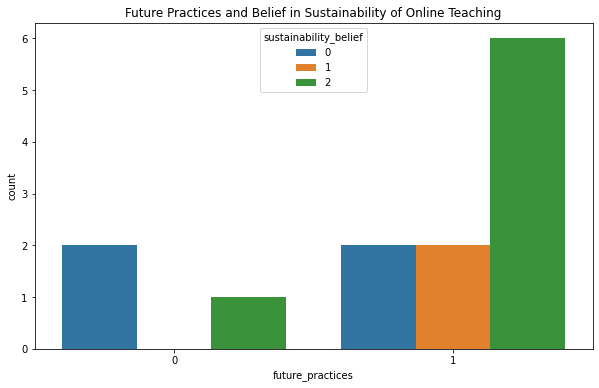

In [21]:
# Plot future practices and sustainability belief
plt.figure(figsize=(10, 6))
sns.countplot(x='future_practices', hue='sustainability_belief', data=data_cleaned)
plt.title('Future Practices and Belief in Sustainability of Online Teaching')
plt.show()

## Data Cleaning and Preprocessing

In [7]:
# Check for missing values
missing_values = data.isnull().sum()

# Drop columns with excessive missing values or irrelevant to the analysis (if applicable)
data_cleaned = data.dropna()

# Convert categorical variables to numeric using Label Encoding or One-Hot Encoding

encoder = LabelEncoder()
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':
        data_cleaned[column] = encoder.fit_transform(data_cleaned[column])

# View cleaned data
data_cleaned.head()


C:\Users\n\AppData\Local\Temp\ipykernel_10676\518156326.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = encoder.fit_transform(data_cleaned[column])


,grade_level_teach,adaptation_level,curriculum_coverage,student_engagement,learning_outcomes,technology_used,tech_issues,admin_support,transition_difficulty,stress_impact,one_on_one_discussions,parent_support,additional_support,engagement_strategies,method_change,tech_access,socioeconomic_impact,future_practices,sustainability_belief,additional_comments
0,2,1,0,1,1,0,1,1,3,1,2,5,12,9,5,4,11,1,2,5
1,0,2,1,1,0,1,1,1,5,2,3,9,9,4,2,0,8,1,1,8
2,2,1,1,1,2,0,1,0,3,1,2,1,5,8,7,2,0,1,2,10
3,2,1,1,1,1,0,1,1,3,2,0,6,3,12,3,3,7,1,2,4
4,2,2,1,1,2,0,1,0,3,1,0,4,6,11,6,5,1,1,0,0


## Exploratory Data Analysis (EDA)

In [60]:
data_cleaned.describe()

,grade_level_teach,adaptation_level,curriculum_coverage,student_engagement,learning_outcomes,technology_used,tech_issues,admin_support,transition_difficulty,stress_impact,one_on_one_discussions,parent_support,additional_support,engagement_strategies,method_change,tech_access,socioeconomic_impact,future_practices,sustainability_belief,additional_comments
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.00000,13.00000,13.00000,13.000000,13.000000,13.00000,13.000000,13.000000,13.00000
mean,1.692308,1.000000,0.615385,1.076923,1.153846,0.307692,1.153846,0.538462,3.153846,1.461538,1.384615,6.00000,6.00000,6.00000,3.923077,3.000000,6.00000,0.769231,1.230769,6.00000
std,0.630425,0.707107,0.650444,0.493548,0.800641,0.480384,0.554700,0.518875,0.688737,0.660225,1.260850,3.89444,3.89444,3.89444,2.841993,1.527525,3.89444,0.438529,0.926809,3.89444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,3.00000,3.00000,3.00000,2.000000,3.000000,3.00000,1.000000,0.000000,3.00000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,6.00000,6.00000,6.00000,3.000000,3.000000,6.00000,1.000000,2.000000,6.00000
75%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,9.00000,9.00000,9.00000,6.000000,3.000000,9.00000,1.000000,2.000000,9.00000
max,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,5.000000,2.000000,3.000000,12.00000,12.00000,12.00000,9.000000,6.000000,12.00000,1.000000,2.000000,12.00000


In [53]:
#Get the summary statistics
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 13
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   grade_level_teach       13 non-null     int32
 1   adaptation_level        13 non-null     int64
 2   curriculum_coverage     13 non-null     int64
 3   student_engagement      13 non-null     int64
 4   learning_outcomes       13 non-null     int64
 5   technology_used         13 non-null     int32
 6   tech_issues             13 non-null     int32
 7   admin_support           13 non-null     int32
 8   transition_difficulty   13 non-null     int64
 9   stress_impact           13 non-null     int64
 10  one_on_one_discussions  13 non-null     int32
 11  parent_support          13 non-null     int64
 12  additional_support      13 non-null     int32
 13  engagement_strategies   13 non-null     int32
 14  method_change           13 non-null     int32
 15  tech_access             1

### Visualizations

1: Histogram of Grade Levels

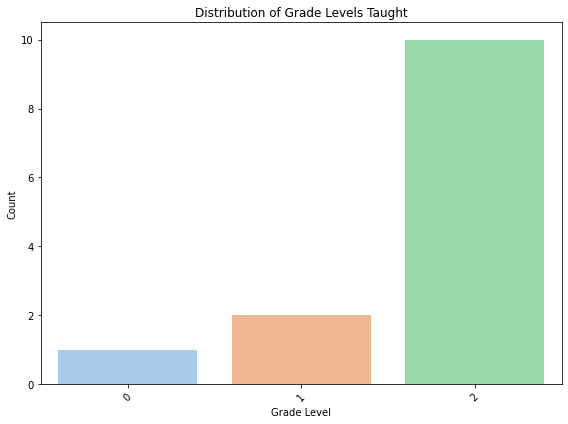

In [54]:
# Matching the Loaded the dataset
df = data_cleaned
# ----   ----
plt.figure(figsize=(8, 6))
sns.countplot(x='grade_level_teach', data=df, palette='pastel')
plt.title('Distribution of Grade Levels Taught')
plt.xlabel('Grade Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pie Chart of Technology Used 

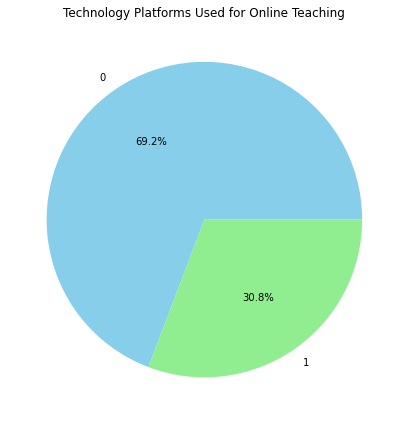

In [56]:
# ----  ----
tech_counts = df['technology_used'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(tech_counts, labels=tech_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Technology Platforms Used for Online Teaching')
plt.tight_layout()
plt.show()


Scatter Plot of Adaptation Level vs Curriculum Coverage

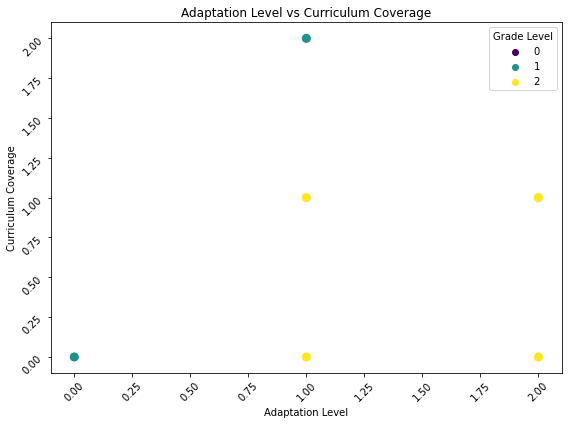

In [57]:
# ----   ----
plt.figure(figsize=(8, 6))
sns.scatterplot(x='adaptation_level', y='curriculum_coverage', hue='grade_level_teach', data=df, s=100, palette='viridis')
plt.title('Adaptation Level vs Curriculum Coverage')
plt.xlabel('Adaptation Level')
plt.ylabel('Curriculum Coverage')
plt.legend(title='Grade Level')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Box Plot of Student Engagement by Tech Access

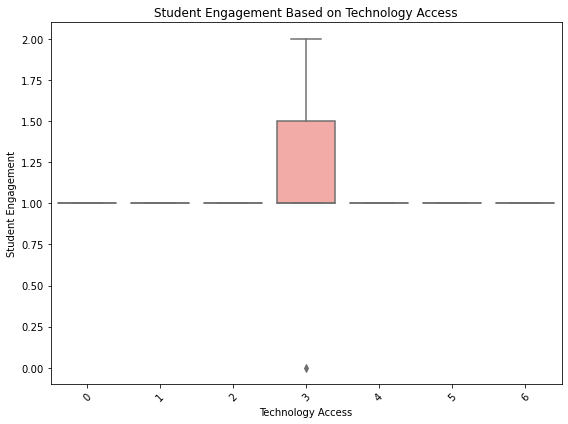

In [58]:
# ----  ----
plt.figure(figsize=(8, 6))
sns.boxplot(x='tech_access', y='student_engagement', data=df, palette='pastel')
plt.title('Student Engagement Based on Technology Access')
plt.xlabel('Technology Access')
plt.ylabel('Student Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Line Plot of Stress Impact over Transition Difficulty

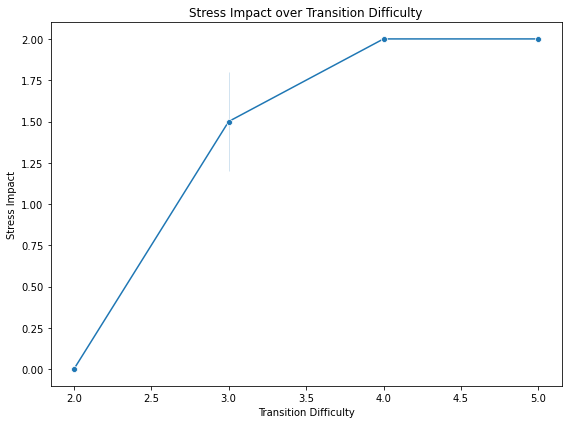

In [61]:
# ----  ----
plt.figure(figsize=(8, 6))
sns.lineplot(x='transition_difficulty', y='stress_impact', data=df, marker='o')
plt.title('Stress Impact over Transition Difficulty')
plt.xlabel('Transition Difficulty')
plt.ylabel('Stress Impact')
plt.tight_layout()
plt.show()


## Analysis: Key Research Objectives

In [28]:
# Load the dataset
df = data_cleaned

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()

# Encoding categorical columns
df['tech_access'] = le.fit_transform(df['tech_access'])
df['student_engagement'] = le.fit_transform(df['student_engagement'])
df['socioeconomic_impact'] = le.fit_transform(df['socioeconomic_impact'])
df['learning_outcomes'] = le.fit_transform(df['learning_outcomes'])
df['parent_support'] = le.fit_transform(df['parent_support'])
df['stress_impact'] = le.fit_transform(df['stress_impact'])
df['adaptation_level'] = le.fit_transform(df['adaptation_level'])
df['curriculum_coverage'] = le.fit_transform(df['curriculum_coverage'])

### 1. Impact of Technology Access on Student Engagement

Technology Access on Student Engagement
                            OLS Regression Results                            
Dep. Variable:     student_engagement   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.091
Method:                 Least Squares   F-statistic:                -1.671e-15
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               1.00
Time:                        20:58:58   Log-Likelihood:                -8.7462
No. Observations:                  13   AIC:                             21.49
Df Residuals:                      11   BIC:                             22.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

C:\Users\n\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


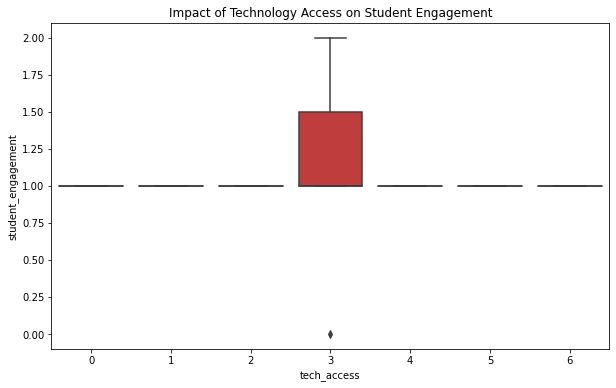

In [40]:
# 1. Impact of Technology Access on Student Engagement
X1 = df[['tech_access']]
y1 = df['student_engagement']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1).fit()
print("Technology Access on Student Engagement")
print(model1.summary())

# Plot technology access vs. student engagement
plt.figure(figsize=(10, 6))
sns.boxplot(x='tech_access', y='student_engagement', data=data_cleaned)
plt.title('Impact of Technology Access on Student Engagement')
plt.show()

### 2. Role of Technology Used in Engagement

In [30]:
# 2. Role of Technology Used in Engagement
X2 = df[['technology_used']]
y2 = df['student_engagement']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()
print("Technology Used on Student Engagement")
print(model2.summary())

Technology Used on Student Engagement
                            OLS Regression Results                            
Dep. Variable:     student_engagement   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.6923
Date:                Sat, 05 Oct 2024   Prob (F-statistic):              0.423
Time:                        20:14:36   Log-Likelihood:                -8.3494
No. Observations:                  13   AIC:                             20.70
Df Residuals:                      11   BIC:                             21.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cons

C:\Users\n\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 3. Influence of Socioeconomic Status on Learning Outcomes

In [41]:
# 3. Influence of Socioeconomic Status on Learning Outcomes
X3 = df[['socioeconomic_impact']]
y3 = df['learning_outcomes']
X3 = sm.add_constant(X3)
model3 = sm.OLS(y3, X3).fit()
print("Socioeconomic Status on Learning Outcomes")
print(model3.summary())

Socioeconomic Status on Learning Outcomes
                            OLS Regression Results                            
Dep. Variable:      learning_outcomes   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                    0.1272
Date:                Sat, 05 Oct 2024   Prob (F-statistic):              0.728
Time:                        21:00:07   Log-Likelihood:                -14.961
No. Observations:                  13   AIC:                             33.92
Df Residuals:                      11   BIC:                             35.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

C:\Users\n\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 4. Parent Support vs Student Engagement

Parent Support vs Student Engagement
                            OLS Regression Results                            
Dep. Variable:     student_engagement   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4.082
Date:                Sat, 05 Oct 2024   Prob (F-statistic):             0.0684
Time:                        21:00:15   Log-Likelihood:                -6.6945
No. Observations:                  13   AIC:                             17.39
Df Residuals:                      11   BIC:                             18.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const  

C:\Users\n\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


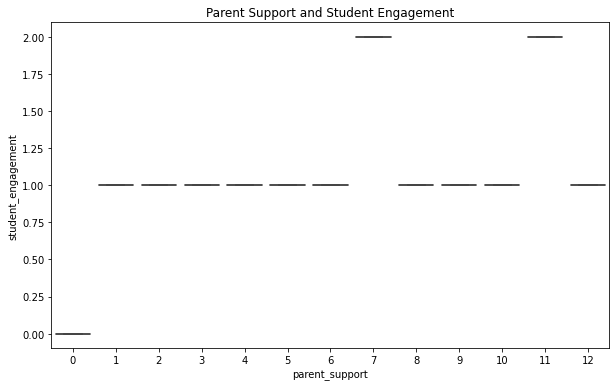

In [42]:
# 4. Parent Support vs Student Engagement
X4 = df[['parent_support']]
y4 = df['student_engagement']
X4 = sm.add_constant(X4)
model4 = sm.OLS(y4, X4).fit()
print("Parent Support vs Student Engagement")
print(model4.summary())

# Plot parent support vs. student engagement
plt.figure(figsize=(10, 6))
sns.boxplot(x='parent_support', y='student_engagement', data=data_cleaned)
plt.title('Parent Support and Student Engagement')
plt.show()


### 5 Stress Impact on Teacher Adaptation and Curriculum Coverage

In [43]:
# 5. Stress Impact on Teacher Adaptation and Curriculum Coverage
X5 = df[['stress_impact']]
y5_1 = df['adaptation_level']
y5_2 = df['curriculum_coverage']

X5 = sm.add_constant(X5)
model5_1 = sm.OLS(y5_1, X5).fit()
model5_2 = sm.OLS(y5_2, X5).fit()

print("Stress Impact on Teacher Adaptation")
print(model5_1.summary())
print("Stress Impact on Curriculum Coverage")
print(model5_2.summary())

Stress Impact on Teacher Adaptation
                            OLS Regression Results                            
Dep. Variable:       adaptation_level   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.607
Date:                Sat, 05 Oct 2024   Prob (F-statistic):              0.231
Time:                        21:00:30   Log-Likelihood:                -12.534
No. Observations:                  13   AIC:                             29.07
Df Residuals:                      11   BIC:                             30.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const     

C:\Users\n\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\n\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 6. Socioeconomic Challenges and Learning Outcomes

Socioeconomic Challenges and Learning Outcomes
                            OLS Regression Results                            
Dep. Variable:      learning_outcomes   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                    0.1272
Date:                Sat, 05 Oct 2024   Prob (F-statistic):              0.728
Time:                        21:00:38   Log-Likelihood:                -14.961
No. Observations:                  13   AIC:                             33.92
Df Residuals:                      11   BIC:                             35.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\n\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


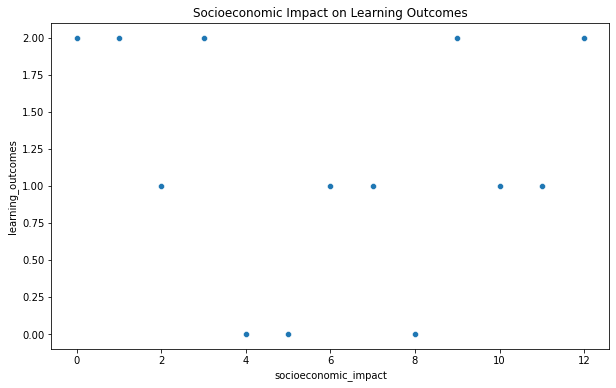

In [44]:
# 6. Socioeconomic Challenges and Learning Outcomes
X6 = df[['socioeconomic_impact']]
y6 = df['learning_outcomes']
X6 = sm.add_constant(X6)
model6 = sm.OLS(y6, X6).fit()
print("Socioeconomic Challenges and Learning Outcomes")
print(model6.summary())

# Plot socioeconomic impact vs. learning outcomes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='socioeconomic_impact', y='learning_outcomes', data=data_cleaned)
plt.title('Socioeconomic Impact on Learning Outcomes')
plt.show()

### 7. Influence of Stress and Parental Support on Teachers' Adaptation and Student Engagement

In [45]:
# 7. Influence of Stress and Parental Support on Teachers' Adaptation and Student Engagement
X7 = df[['stress_impact', 'parent_support']]
y7_1 = df['adaptation_level']
y7_2 = df['student_engagement']

X7 = sm.add_constant(X7)
model7_1 = sm.OLS(y7_1, X7).fit()
model7_2 = sm.OLS(y7_2, X7).fit()

print("Stress and Parental Support on Teachers' Adaptation")
print(model7_1.summary())
print("Stress and Parental Support on Student Engagement")
print(model7_2.summary())

Stress and Parental Support on Teachers' Adaptation
                            OLS Regression Results                            
Dep. Variable:       adaptation_level   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.7832
Date:                Sat, 05 Oct 2024   Prob (F-statistic):              0.483
Time:                        21:02:03   Log-Likelihood:                -12.475
No. Observations:                  13   AIC:                             30.95
Df Residuals:                      10   BIC:                             32.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

C:\Users\n\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\n\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


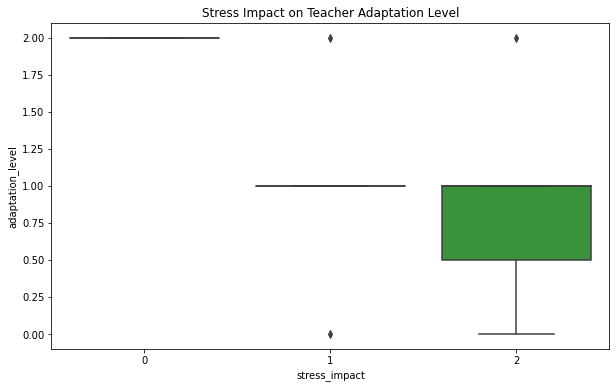

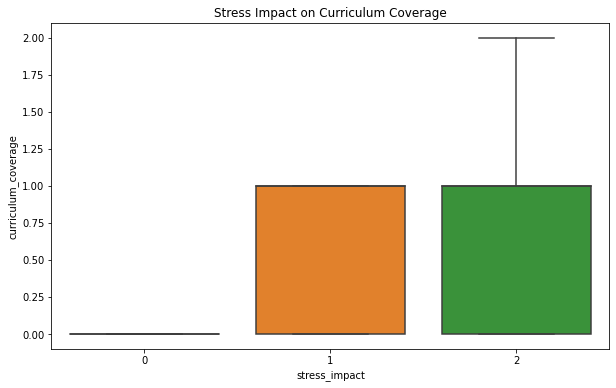

In [46]:
# Plot stress impact vs. adaptation level
plt.figure(figsize=(10, 6))
sns.boxplot(x='stress_impact', y='adaptation_level', data=data_cleaned)
plt.title('Stress Impact on Teacher Adaptation Level')
plt.show()

# Plot stress impact vs. curriculum coverage
plt.figure(figsize=(10, 6))
sns.boxplot(x='stress_impact', y='curriculum_coverage', data=data_cleaned)
plt.title('Stress Impact on Curriculum Coverage')
plt.show()


## Correlation Analysis

In [23]:
# Compute correlation matrix
correlation_matrix = data_cleaned.corr()
print(correlation_matrix)

                        grade_level_teach  adaptation_level  \
grade_level_teach                1.000000     -1.869391e-01   
adaptation_level                -0.186939      1.000000e+00   
curriculum_coverage             -0.312653      3.623715e-01   
student_engagement              -0.185419      2.387835e-01   
learning_outcomes                0.266700      2.943920e-01   
technology_used                 -0.762001     -2.453267e-01   
tech_issues                      0.146647     -4.249183e-01   
admin_support                   -0.470317     -2.271284e-01   
transition_difficulty           -0.649592     -3.458471e-17   
stress_impact                   -0.231015     -3.570028e-01   
one_on_one_discussions          -0.258065      9.346956e-02   
parent_support                  -0.135769      3.026138e-02   
additional_support              -0.135769      2.118296e-01   
engagement_strategies            0.135769      9.078413e-02   
method_change                    0.311271     -6.218146

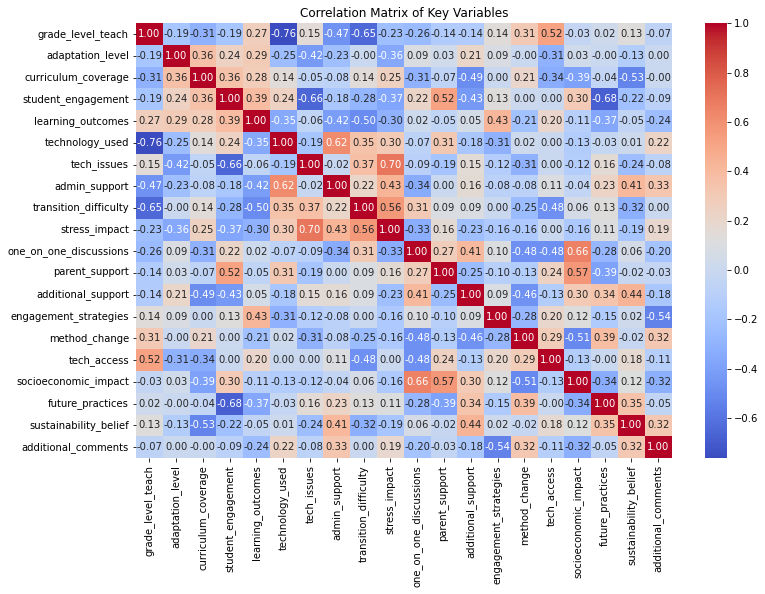

In [24]:
# Compute correlation matrix
correlation_matrix = data_cleaned.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()


# THE END